# Serie 10
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français or English** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension**.

Les tentatives infructueuses, les explications, commentaires et analyses des échecs **rapportent des points**. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Exercice 1
Implémentez une type de données abstrait `HashTable` (table de hachage) qui utilise une dispersion linéaire (linear probing strategy) pour résoudre les collisions. La classe `HashTable` et ses fonctions à implémenter sont données - libre à vous cependant d'ajouter de nouvelles méthodes aux classes. Vous pouvez optionnellement utiliser une dispersion quadratique.

Vous devez implémenter une classe `HashableImpl` dont les fonctions sont données. Cela correspond aux éléments qui seront stockés dans la hash table.

In [16]:
import dataclasses


# Représente un élément pouvant être stocké dans une instance de HashTable.
class HashableImpl[TKey]:
    def __init__(self, key: TKey, is_active: bool = False):
        self.key = key
        self.is_active = is_active  # (useless for you but keep it)

    # Calcule le hash de cette instance de HashableImpl.
    # La valeur retournée est un hash, représenté par un nombre entier.
    def hash(self, table_size: int) -> int:
        key_hash = hash(self.key)
        return key_hash % table_size

    # Retourne la clé comme représentation de cette instance
    # (vous n'avez pas besoin de modifier cette fonction).
    def __str__(self):
        return str(self.key)


@dataclasses.dataclass
class _HashTableCounter:
    collisions: int = dataclasses.field(default=0)


class HashTable[TKey]:
    def __init__(self, initial_size: int = 17):
        if not HashTable._is_prime(initial_size):
            raise ValueError("size of hash table must be prime")

        self._reinitialize(initial_size)

    def _reinitialize(self, size: int) -> None:
        assert self._is_prime(size)

        self._table: list[HashableImpl[TKey] | None] = [None for _ in range(size)]
        self._size = 0
        self._counter = _HashTableCounter()

    def number_of_collisions(self):
        return self._counter.collisions

    def make_empty(self):
        self._reinitialize(len(self._table))

    def is_empty(self):
        return self._size == 0

    def insert(self, element: HashableImpl[TKey]) -> None:
        table_size = len(self._table)
        if self._size == table_size:
            raise Error("attempted to insert an element into full hash table")

        hash = element.hash(table_size)
        for cell_offset in range(table_size):
            candidate_idx = (hash + cell_offset) % table_size

            candidate_entry = self._table[candidate_idx]
            if candidate_entry is not None and candidate_entry.is_active:
                if candidate_entry.key == element.key:
                    raise Error("attempted to insert duplicate")

                continue

            element.is_active = True
            self._table[candidate_idx] = element
            self._size += 1
            return

    def remove(self, element: HashableImpl[TKey]) -> HashableImpl[TKey]:  # Throws ItemNotFound
        table_size = len(self._table)
        hash = element.hash(table_size)

        for cell_offset in range(table_size):
            candidate_idx = (hash + cell_offset) % table_size

            candidate_entry = self._table[candidate_idx]
            if candidate_entry is None:
                raise ItemNotFound(element)

            if candidate_entry.is_active and candidate_entry.key == element.key:
                candidate_entry.is_active = False
                self._size -= 1
                return candidate_entry

        raise ItemNotFound(element)

    def find(self, element: HashableImpl[TKey]) -> HashableImpl[TKey]:  # Throws ItemNotFound
        table_size = len(self._table)

        hash = element.hash(table_size)
        for cell_offset in range(table_size):
            candidate_idx = (hash + cell_offset) % table_size

            candidate_entry = self._table[candidate_idx]
            if candidate_entry is None:
                self._counter.collisions += min(cell_offset, 1)
                raise ItemNotFound(element)

            if candidate_entry.is_active and candidate_entry.key == element.key:
                self._counter.collisions += min(cell_offset, 1)
                return candidate_entry

        raise ItemNotFound(element)

    @staticmethod
    def _is_prime(n: int) -> bool:
        if n % 2 == 0:
            return False

        divisor = 3
        while divisor ^ 2 <= n:
            if n % divisor == 0:
                return False

            divisor += 2

        return True


class Error(Exception):
    pass


class ItemNotFound(Error):
    pass

In [17]:
def test_unexisting_value(hashable):
    try:
        _table.find(hashable)
        print("Error: the item '", hashable, "' must not exist in the hash table")
    except ItemNotFound:
        pass
    except Exception as e:
        print("Error: an unexpected exception has been raised", type(e), ":", e)
        raise

_table = HashTable[int]()
assert _table.is_empty() == True
h1 = HashableImpl(156)
_table.insert(h1)
assert _table.is_empty() == False
h2 = HashableImpl(90)
_table.insert(h2)
h3 = HashableImpl(31)
_table.insert(h3)
print("Should display three elements, while the other entries should be None:")
for e in _table._table:
    if e is not None:
        if e.is_active:
            print(e)
    else:
        print(e)
print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert _table.find(h1) != None
assert _table.find(h2) != None
assert _table.find(h3) != None

temp1 = _table.find(h1)
print("h1: ", temp1.key)
temp3 = _table.find(h3)
print("h3: ", temp3.key)
print()
_table.remove(h2)
print("Should display two elements, while the other entries should be None:")
for e in _table._table:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)
print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert _table.find(h1) != None
test_unexisting_value(h2)
assert _table.find(h3) != None

h4 = HashableImpl(41)
_table.insert(h4)
h5 = HashableImpl(54)
_table.insert(h5)
print("Should display four elements, while the other entries should be None:")
for e in _table._table:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert _table.find(h1) != None
test_unexisting_value(h2)
assert _table.find(h3) != None
assert _table.find(h4) != None
assert _table.find(h5) != None

h6 = HashableImpl(716)
_table.insert(h6)
print("Should display five elements, while the other entries should be None:")
for e in _table._table:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert _table.find(h1) != None
test_unexisting_value(h2)
assert _table.find(h3) != None
assert _table.find(h4) != None
assert _table.find(h5) != None
assert _table.find(h6) != None

_table.make_empty()
assert _table.is_empty() == True
print("Should display all entries as None:")
for e in _table._table:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
test_unexisting_value(h1)
test_unexisting_value(h2)
test_unexisting_value(h3)
test_unexisting_value(h4)
test_unexisting_value(h5)
test_unexisting_value(h6)

try:
    _table.remove(h4)
    print("Error: an ItemNotFound exception must be raised")
except ItemNotFound:
    pass
except Exception as e:
    print("Error: an unexpected exception has been raised", type(e), ":", e)
    raise

# Test whether tombstones are correctly interpreted
_table = HashTable[int](5)
_element_collision_1 = HashableImpl(1)
_element_collision_2 = HashableImpl(6)

_table.insert(_element_collision_1)
_table.insert(_element_collision_2)
_table.remove(_element_collision_1)

_table.find(_element_collision_2)

Should display three elements, while the other entries should be None:
None
None
None
156
None
90
None
None
None
None
None
None
None
None
31
None
None

h1:  156
h3:  31

Should display two elements, while the other entries should be None:
None
None
None
156
None
None
None
None
None
None
None
None
None
None
31
None
None

Should display four elements, while the other entries should be None:
None
None
None
156
54
None
None
41
None
None
None
None
None
None
31
None
None

Should display five elements, while the other entries should be None:
None
None
716
156
54
None
None
41
None
None
None
None
None
None
31
None
None

Should display all entries as None:
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None



### Explications

This implementation of a hash table uses open-address hashing with linear probing to deal with collisions.
Open-address hashing means that if an element's hash requires an element to be located at index $i$, but index $i$ is already occupied, we use a probing algorithm to find an alternative bucket.
This is opposed to closed-address hashing schemes where a single bucket can contain multiple entries (typically implemented as a linked list).

The probing strategy needs to ensure the following two things:

- When inserting a new element, we need to find a slot where the new element can be stored
- When querying an element, we need to re-find all slots in which the element could potentially be stored
  - Not trivial if elements are allowed to be removed
    - If the element that caused the collision in the first place is removed, the displacement chain might be broken
    - Requires additional repair logic on element removal

#### Element indexing

We implemented a linear probing-based approach.

In linear probing, an entry's $x$th alternative index can be determined using a linear function.
Linear functions are generally of the form $a_0 + a_1 * x$.
While it is possible to use arbitrary constants for $a_0$, we went with the most ordinary constant $1$ (i.e., $idx_{alt} = 1 \bullet i + idx_{orig}$).
Quadratic probing follows the same principle, except for the fact that the indices follow a quadratic function.

#### Removal strategies

The indexing of the elements does not resolve the problem around removed elements breaking the displacement chain.
This is where tombstones come into play.

Relocate subsequent elements that collide with the element to be removed.
This relocation may require further relocations.

Consider a hash table of length 5 with elements 1, 6, and 12.
6 collides with 1 and is therefore displaced by one cell.
When we remove 1, we need to relocate 6 as it will otherwise cause search to fail.
This relocation then necessitates the relocation of 12.

For illustrative purposes, we present two more strategies that can be alternatively used.

##### Tombstone

A tombstone is a special marker element that indicates that a particular entry was deleted.
When iterating over possible relocated elements, a tombstone indicates that the iteration should be continued as there might be further relocated entries.

##### Push-back on deletion

If we remove an element, we consider all elements that are potentially displaced because of that element.
For every such element, we verify whether the element can be moved into the now empty bucket.
If so, we move that element and repeat the process for the newly emptied bucket.
We continue this process up until we find an empty bucket.

An element can be moved if we don't move it past its ideal index.

##### Robin-hood hashing

Robin hood takes from the rich and gives to the poor.
Here, the "wealth" of an entry is defined in terms of its distance to its ideal index.
That is, elements that were located by multiple indices are considered poorer than an element that was assigned its ideal index.

Robin-hood hashing "redistributes" the wealth of elements, meaning that the variance of the displacement distances is reduced.
When iterating over the alternative buckets, robin-hood hashing compares the displacement of the entry at the current displacement index with the displacement of the entry that we'd like to insert.
If the entry at the current displacement index is closer to its ideal index than the element to be inserted is to its respective ideal index, we "swap" the two elements: The insertion entry is put at the current displacement index, and we now try to find a new slot for the element that we replaced.

This approach does not only lower the variance of the displacement distances but it also improves the worst case.
Furthermore, it simplifies the implementation of lookups: Iteration can be stopped as soon as an empty bucket or a non-displaced element has been found.
Tombstones are not required.

### Exercice 1.1
Créer une hash table de taille 997. Disperser dans la table $n$ clés, pour chaque $n$ entier dans $[200,900]$.

Un *miss* (similaire à une collision) est, lors d'une phase de sondage, la visite d'une cellule de la table qui ne correspond pas à la clé recherchée.

Pour chaque $n$, afficher le nombre de *miss* pour 100 requêtes `find` de clés existantes (les choisir au hasard).





Quelle est la relation entre le facteur de charge (load factor) de la table de hachage et le nombre de miss ?

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import typing


def generate_random_table(table_size: int, element_count: int) -> typing.Tuple[HashTable[int], list[int]]:
    table = HashTable[int](table_size)
    keys: list[int] = []

    for _ in range(element_count):
        while True:
            try:
                random_unique_key = get_random_number()

                entry = HashableImpl(random_unique_key)
                table.insert(entry)

                keys.append(random_unique_key)
                break
            except Error:
                pass

    assert len(keys) == element_count
    return table, keys


def count_misses(table: HashTable[int], query_keys: list[int]) -> int:
    for key in query_keys:
        query_element = HashableImpl(key)
        table.find(query_element)

    return table.number_of_collisions()


def get_random_number() -> int:
    return np.random.randint(4242)


def run_test(element_count: int) -> int:
    print("run for element count", element_count)
    table, keys = generate_random_table(table_size=997, element_count=element_count)
    return count_misses(table, keys)

x = np.arange(200, 900, 1)
y = [run_test(element_count) for element_count in x]

run for element count 200
run for element count 201
run for element count 202
run for element count 203
run for element count 204
run for element count 205
run for element count 206
run for element count 207
run for element count 208
run for element count 209
run for element count 210
run for element count 211
run for element count 212
run for element count 213
run for element count 214
run for element count 215
run for element count 216
run for element count 217
run for element count 218
run for element count 219
run for element count 220
run for element count 221
run for element count 222
run for element count 223
run for element count 224
run for element count 225
run for element count 226
run for element count 227
run for element count 228
run for element count 229
run for element count 230
run for element count 231
run for element count 232
run for element count 233
run for element count 234
run for element count 235
run for element count 236
run for element count 237
run for elem

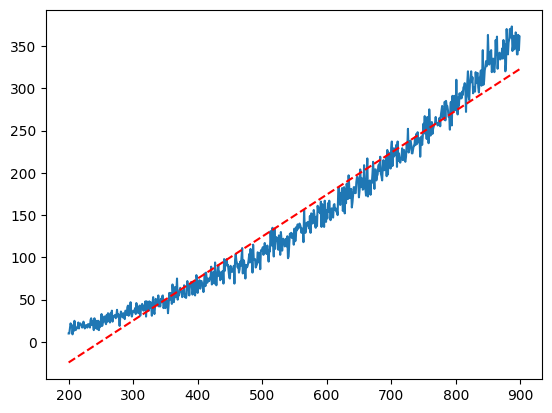

In [19]:
plt.plot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

Unsurprisingly, the number of misses is positively correlated to the map's load factor.
As we insert random elements into the list, we can assume the insertion indices to be randomly distributed.
For any element in the list, a higher number of inserted elements therefore increases the chance of a collision.

### Exercice 1.2
Quelle est la particularité de 997, la taille choisie pour la hash table ?

997 is a prime number and hence coprime to all numbers smaller than it.
A number is said to be coprime to another if the numbers' greatest common divisor is $1$.

This is relevant when it comes to the dispersion of elements.
Consider the following function which is an approximation of how strings are hashed in java:

```java
public static int hashCode(String str) {
    int result = 0;
    for (int i = 0; i < str.length(); i++) {
        result = 31 * result + Objects.hashCode(str.charAt(i));
    }
    return result;
}
```

Suppose that we didn't use a constant that is coprime with the number of buckets.
Rather, suppose that the hash constant was $2$ and that the list's size was $1000$.
This implies $2$ would be a divisor of all resulting hash codes.
If $2$ also is a divisor of the number of buckets, we use our buckets much less efficiently: effectively, we use only half of our buckets (except for the string's last character).

Prime numbers are only coprime to their multiples.
For small constant numbers (or large lists), choosing prime list lengths therefore safeguard against such constants.
Recall that the hash function to be used is user-provided and therefore not controlled by the map implementation.

In practice, it seems to be common to use list lengths that are multiples of two (cf. [OpenJDK](https://github.com/openjdk/jdk/blob/4a22c1fefc879ee50ef032e741e92357284a09bf/src/java.base/share/classes/java/util/HashMap.java#L238), [V8](https://github.com/v8/v8/blob/e3cdab9c8aca23f1c47dc4c0a37a4f05ad79b937/src/base/hashmap.h#L418)).
This means that $2$ must not be used as a constant in hash functions, which is an assumption that generally holds in practice.
Take the example of Java:

- hash code of string has been outlined
- hash code of integer is its literal value
- hash code of object is based on the instance's address, unless overridden